In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine=pd.read_csv('winequality.csv')

In [3]:
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
wine.isnull().sum().sum()

38

In [9]:
for column in wine.columns:
    if wine[column].isnull().sum() > 0:
        wine[column] = wine[column].fillna(wine[column].mean())

In [10]:
wine.isnull().sum().sum()

0

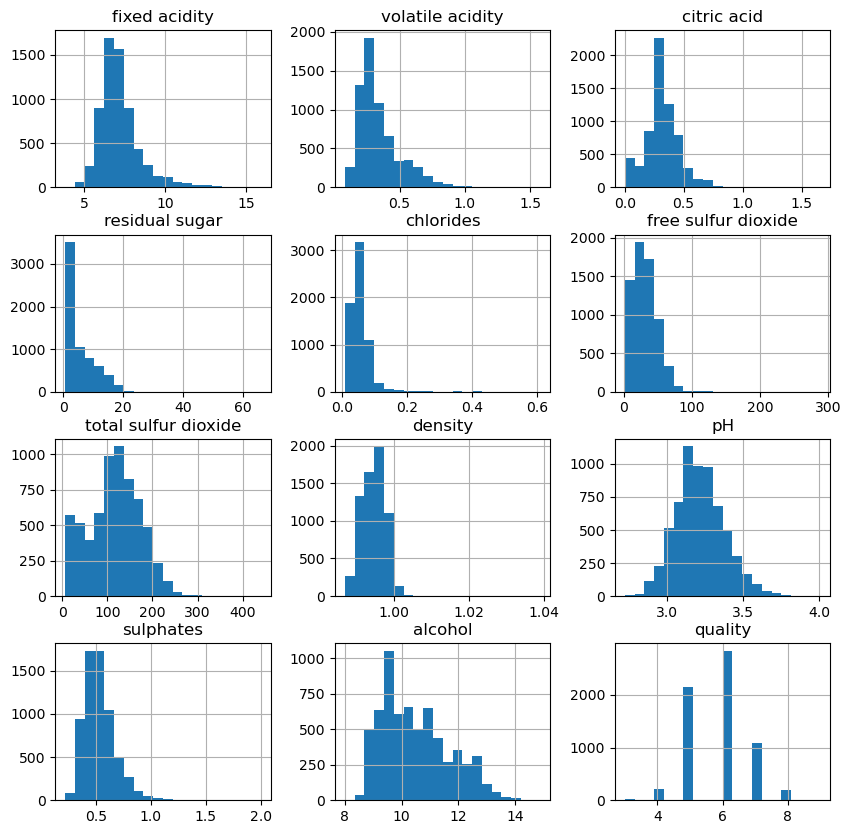

In [11]:
wine.hist(bins=20, figsize=(10, 10))
plt.show()

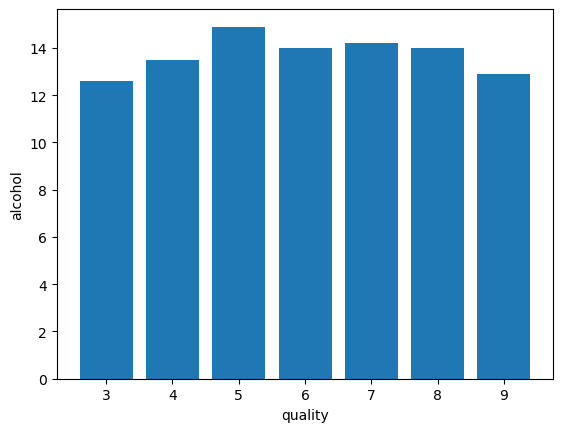

In [12]:
plt.bar(wine['quality'], wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

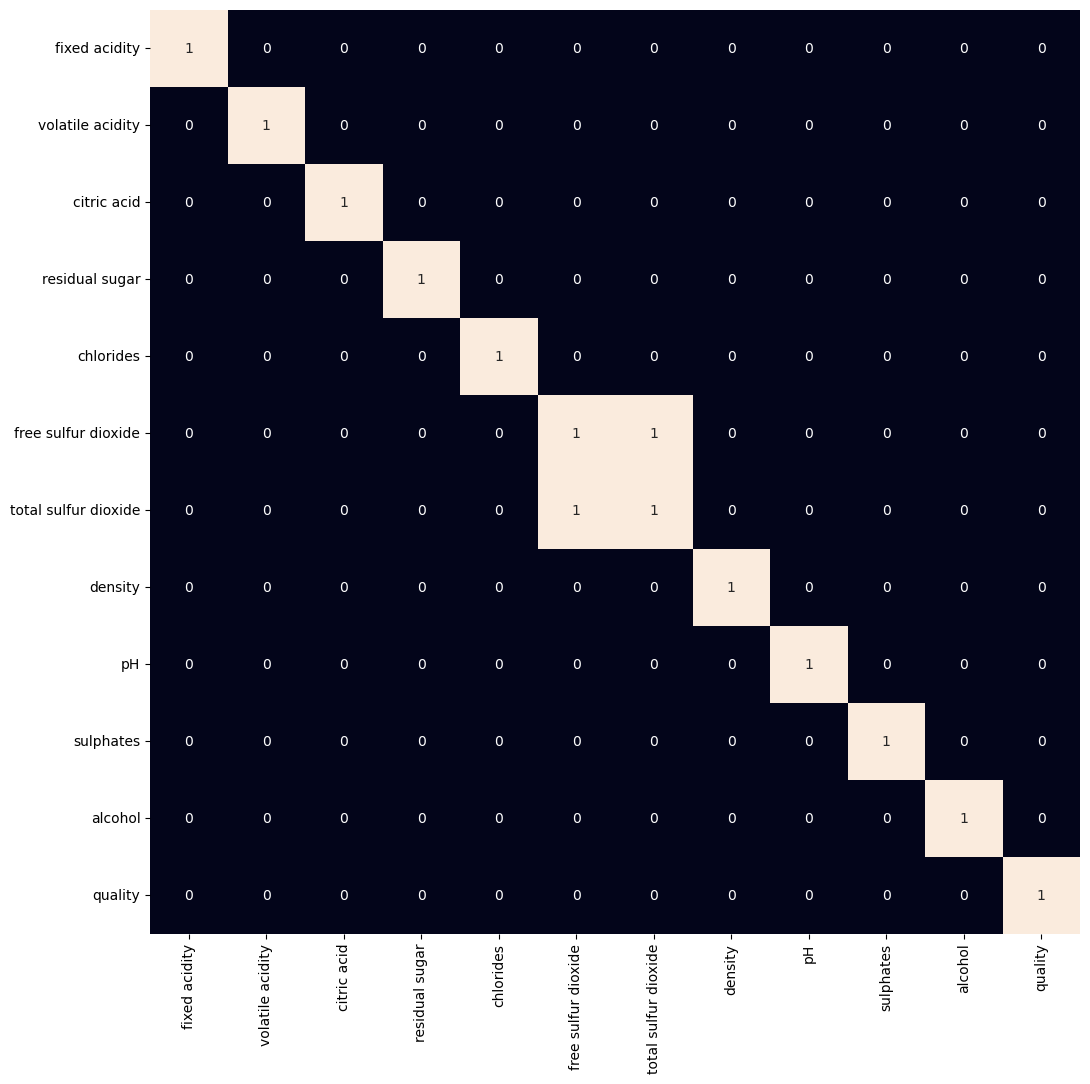

In [13]:
plt.figure(figsize=(12, 12))
sb.heatmap(wine.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [14]:
wine = wine.drop('total sulfur dioxide', axis=1)

In [15]:
ratings=(2,6.1,10)
column_names=['bad','good']
wine['quality']=pd.cut(wine['quality'], bins=ratings, labels=column_names)

In [16]:
wine.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.27,0.36,20.70,0.045,45.0,1.0010,3.00,0.45,8.8,bad
1,white,6.300000,0.30,0.34,1.60,0.049,14.0,0.9940,3.30,0.49,9.5,bad
2,white,8.100000,0.28,0.40,6.90,0.050,30.0,0.9951,3.26,0.44,10.1,bad
3,white,7.200000,0.23,0.32,8.50,0.058,47.0,0.9956,3.19,0.40,9.9,bad
4,white,7.200000,0.23,0.32,8.50,0.058,47.0,0.9956,3.19,0.40,9.9,bad
5,white,8.100000,0.28,0.40,6.90,0.050,30.0,0.9951,3.26,0.44,10.1,bad
6,white,6.200000,0.32,0.16,7.00,0.045,30.0,0.9949,3.18,0.47,9.6,bad
7,white,7.000000,0.27,0.36,20.70,0.045,45.0,1.0010,3.00,0.45,8.8,bad
8,white,6.300000,0.30,0.34,1.60,0.049,14.0,0.9940,3.30,0.49,9.5,bad
9,white,8.100000,0.22,0.43,1.50,0.044,28.0,0.9938,3.22,0.45,11.0,bad


In [17]:
label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])

In [18]:
label_quality=LabelEncoder()
wine['type']=label_quality.fit_transform(wine['type'])

In [19]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,0


<AxesSubplot:xlabel='quality', ylabel='count'>

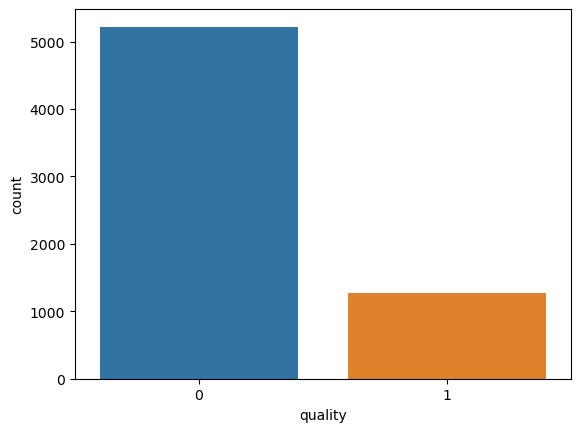

In [20]:
sb.countplot(wine['quality'])

In [21]:
wine[['type','quality']].value_counts()

type  quality
1     0          3838
0     0          1382
1     1          1060
0     1           217
dtype: int64

In [22]:
X=wine.drop('quality', axis=1)
y=wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
models = [SVC(), RandomForestClassifier(), MLPClassifier(), AdaBoostClassifier()]

for i in range(4):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train))*100)
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(X_test))*100)
    print()


SVC() : 
Training Accuracy :  63.5395218625796
Validation Accuracy :  62.31276973851231

RandomForestClassifier() : 
Training Accuracy :  100.0
Validation Accuracy :  77.39273927392739

MLPClassifier() : 
Training Accuracy :  70.60456122994333
Validation Accuracy :  66.92371160192943

AdaBoostClassifier() : 
Training Accuracy :  63.946510249306755
Validation Accuracy :  64.08511043412034



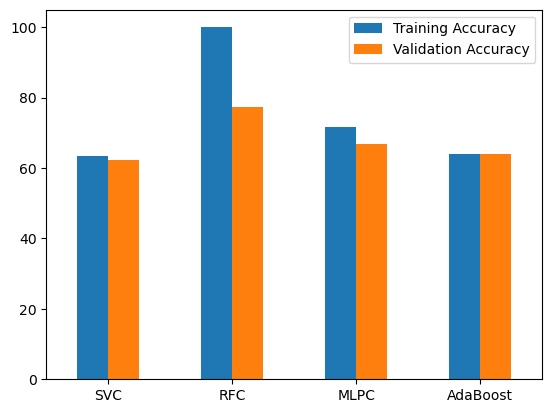

In [43]:
Training_Accuracy = [63.54, 100, 71.60, 63.94]
Validation_Accuracy = [62.31, 77.39, 66.92, 64.09]
index = ['SVC', 'RFC', 'MLPC','AdaBoost']
df = pd.DataFrame({'Training Accuracy': Training_Accuracy,'Validation Accuracy': Validation_Accuracy}, index=index)
ax = df.plot.bar(rot=0)

Random Forest Classifier

In [26]:
rfc=RandomForestClassifier()
rfc_clf=rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)

In [27]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1313
           1       0.80      0.59      0.68       312

    accuracy                           0.89      1625
   macro avg       0.86      0.78      0.81      1625
weighted avg       0.89      0.89      0.89      1625



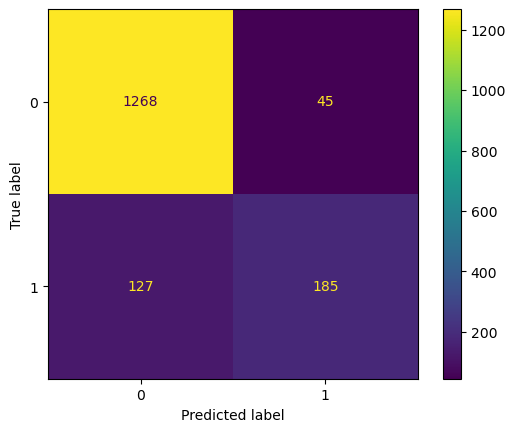

In [28]:
cm_rfc = confusion_matrix(y_test,pred_rfc, labels=rfc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc_clf.classes_)
disp.plot()
plt.show()

SVM Classifier

In [29]:
svf=svm.SVC()
svf_clf=svf.fit(X_train, y_train)
pred_svf=svf.predict(X_test)

In [30]:
print(classification_report(y_test, pred_svf))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1313
           1       0.65      0.28      0.39       312

    accuracy                           0.83      1625
   macro avg       0.75      0.62      0.65      1625
weighted avg       0.81      0.83      0.81      1625



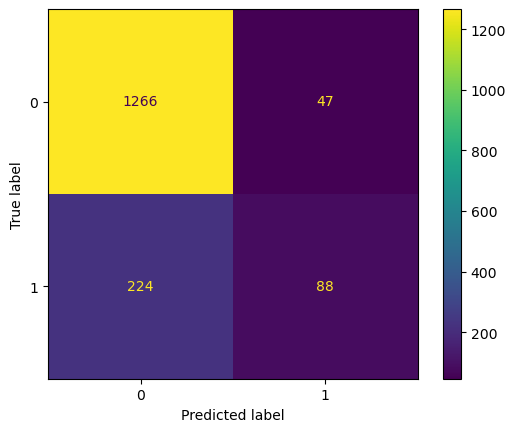

In [31]:
cm_svf = confusion_matrix(y_test,pred_svf, labels=svf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svf, display_labels=svf_clf.classes_)
disp.plot()
plt.show()

Neural Network

In [32]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc_clf=mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

In [33]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1313
           1       0.61      0.36      0.46       312

    accuracy                           0.83      1625
   macro avg       0.74      0.65      0.68      1625
weighted avg       0.81      0.83      0.82      1625



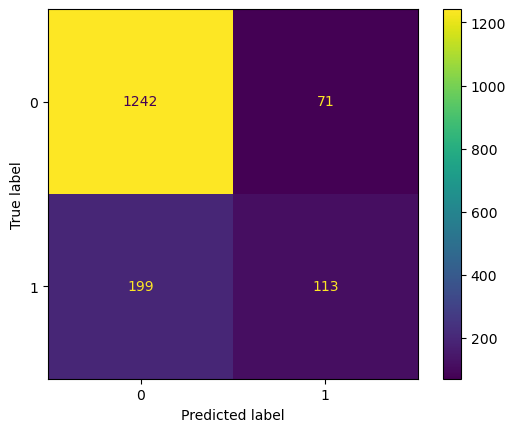

In [34]:
cm_mlpc = confusion_matrix(y_test,pred_mlpc, labels=mlpc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlpc, display_labels=mlpc_clf.classes_)
disp.plot()
plt.show()

Adaptive Boosting Classifier

In [35]:
Ada=AdaBoostClassifier()
Ada_clf=Ada.fit(X_train, y_train)
pred_Ada=Ada.predict(X_test)

In [36]:
print(classification_report(y_test, pred_Ada))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1313
           1       0.59      0.34      0.43       312

    accuracy                           0.83      1625
   macro avg       0.73      0.64      0.66      1625
weighted avg       0.81      0.83      0.81      1625



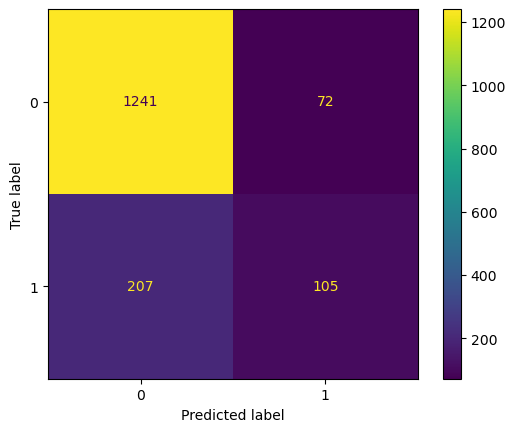

In [37]:
cm_Ada = confusion_matrix(y_test,pred_Ada, labels=Ada_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Ada, display_labels=Ada_clf.classes_)
disp.plot()
plt.show()

In [38]:
acc_rfc=accuracy_score(y_test, pred_rfc)*100
acc_rfc

89.41538461538462

In [39]:
acc_svf=accuracy_score(y_test, pred_svf)*100
acc_svf

83.32307692307693

In [40]:
acc_mlpc=accuracy_score(y_test, pred_mlpc)*100
acc_mlpc

83.38461538461537

In [41]:
acc_Ada=accuracy_score(y_test, pred_Ada)*100
acc_Ada

82.83076923076923

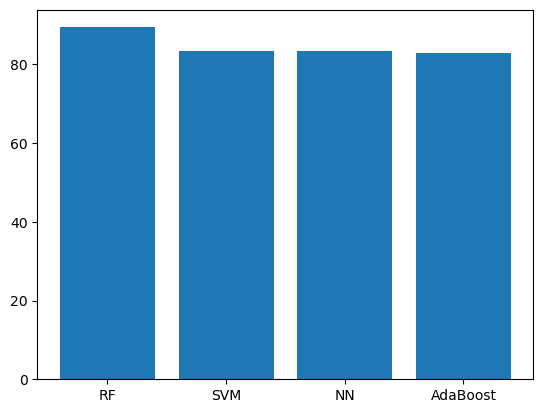

In [42]:
Model=['RF','SVM','NN','AdaBoost']
Score=[acc_rfc, acc_svf, acc_mlpc, acc_Ada]
plt.bar(Model, Score)
plt.show()